In [1]:
from fastai.vision import * 
from functools import partial
import torch
import os


os.environ['KMP_DUPLICATE_LIB_OK']='True'


In [2]:
np.random.seed(42) # set random seed so we always get the same validation set
src = (ImageList.from_csv('','sentimentDataTrain.csv', folder='sentiment-spectogram', )
       # Load data from csv
       .split_by_rand_pct(0.2)
       # split data into training and validation set (20% validation)
       .label_from_df()
       # label data using the tags column (second column is default)
)

In [3]:
tfms = get_transforms()
data = (src.transform( tfms ,size=128)
        # Apply transforms and scale images to 128x128
        .databunch(bs=64).normalize(imagenet_stats)
        # Create databunch with batchsize=64 and normalize the images
)

In [4]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
# create cnn with the resnet50 architecture
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.00E-03
Min loss divided by 10: 4.79E-03


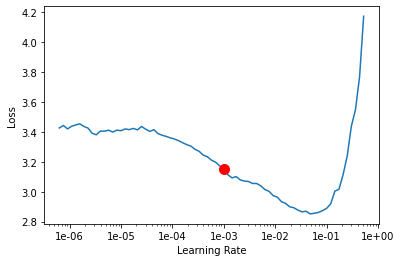

In [5]:
learn.unfreeze()
learn.lr_find() # find learning rate
learn.recorder.plot(suggestion=True)

In [6]:
learn.fit_one_cycle(50,max_lr=slice(1e-05,1e-02)) # train model for 4 epochs

epoch,train_loss,valid_loss,accuracy,time
0,3.142179,2.087164,0.250000,00:11
1,2.847561,1.821743,0.368056,00:11
2,2.612808,1.716646,0.447917,00:11
3,2.424749,1.656680,0.451389,00:11
4,2.247952,1.673628,0.513889,00:11
5,2.061885,1.573144,0.472222,00:11
6,1.926313,1.543073,0.527778,00:11
7,1.778028,1.257619,0.569444,00:11
8,1.625184,1.352741,0.583333,00:11
9,1.470091,1.293269,0.569444,00:11


In [7]:
learn.export(file='sentiment50epochs.pkl')

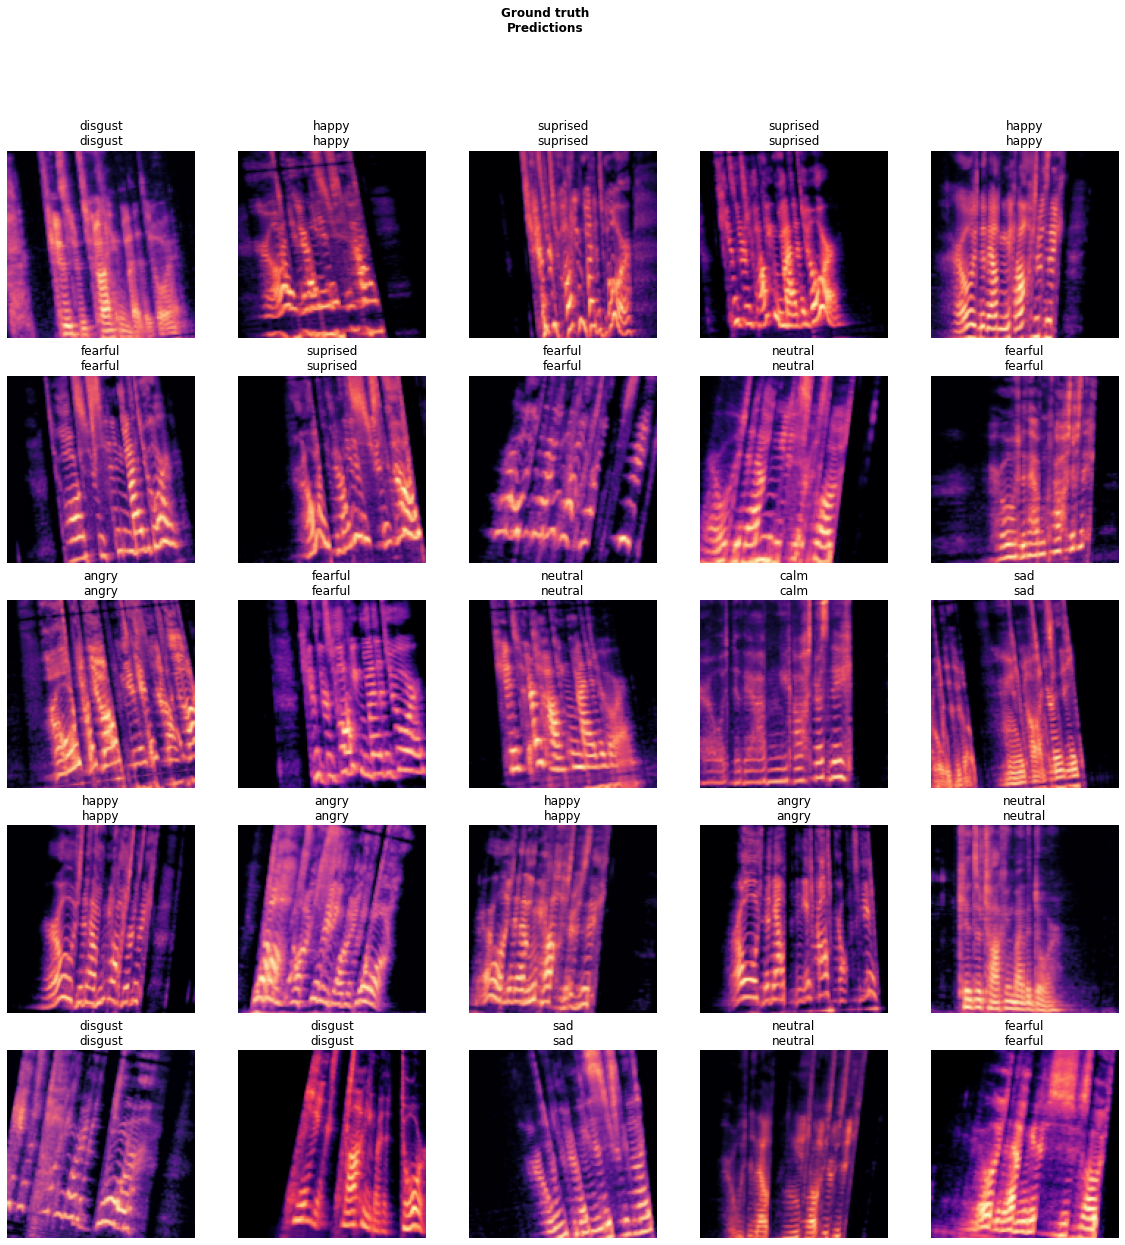

In [8]:
learn.show_results(ds_type=DatasetType.Train)